In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from scipy.stats import pearsonr
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import SelectFromModel
import matplotlib.pyplot as plt
import seaborn as sns

Compiling complete dataframe

In [2]:
df_knn = pd.read_csv("df_carox_tfidf.csv")

In [3]:
df_knn

,index,tfidf_0,tfidf_1,tfidf_2,tfidf_3,tfidf_4,tfidf_5,tfidf_6,tfidf_7,tfidf_8,...,sweet,tar,tea,tobacco,tree,tropical,vanilla,violet,woody,X..CaryophylleneOxide
0,3,0.0,0.0,0.0,0.0,0.0,0.145484,0.0,0.0,0.0,...,0,1,0,0,0,0,0,0,0,0.0
1,4,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0.0
2,4,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0.0
3,5,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0,0,0,0,0,0,1,0,0,0.0
4,7,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0,1,0,0,0,0,1,1,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,42971,0.0,0.0,0.0,0.0,0.0,0.322452,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0.0
59996,42972,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0.0
59997,42973,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0.0
59998,42975,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0.0


Splitting dependent and independent variables

In [4]:
X = df_knn.drop(['X..CaryophylleneOxide', 'index'], axis = 1)
y = df_knn[['X..CaryophylleneOxide']]

Plotting histograms on target variable

In [5]:
y_array = y.to_numpy()
y_array

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]])

<AxesSubplot:ylabel='Count'>

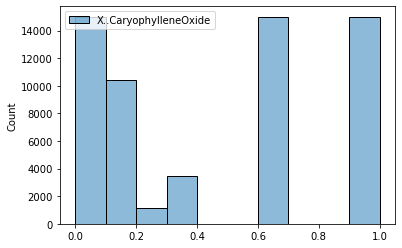

In [6]:
sns.histplot(y, bins = 10)

Train test split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.2)

In [8]:
X_train1, X_val, y_train1, y_val = train_test_split(X_train, y_train, random_state=1, test_size=0.25)

kNN modeling (before Feature selection and Hyperparameter Tuning)

In [9]:
knreg = KNeighborsRegressor()
knreg.fit(X_train1, y_train1)
y_pred_knreg = knreg.predict(X_val)
y_pred_knreg_r2 = knreg.predict(X_train1)

In [10]:
mean_absolute_error(y_val, y_pred_knreg)

0.06706835317460319

In [11]:
#train
r2_score(y_train1, y_pred_knreg_r2)

0.8803670257390878

In [12]:
#val
r2_score(y_val, y_pred_knreg)

0.7862082729037905

Feature Selection

In [13]:
rfreg = RandomForestRegressor()

In [14]:
selector = SelectFromModel(rfreg).fit(X_train1, y_train1)

/Users/andalanputra/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_from_model.py:357: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)


In [15]:
selector.estimator_.feature_importances_

array([8.92038471e-04, 3.66624716e-04, 5.44348657e-04, 6.30088626e-04,
       6.56033388e-04, 1.06984352e-03, 1.98956261e-03, 1.70791262e-03,
       3.53060417e-04, 1.52903672e-03, 5.01987887e-04, 3.00555410e-02,
       1.44047852e-03, 2.14994437e-03, 2.93551570e-04, 4.27100554e-04,
       6.19409659e-04, 1.06396515e-03, 7.38073492e-05, 1.02182921e-03,
       1.66386763e-03, 1.46106440e-03, 1.36933806e-03, 1.39203821e-04,
       1.41906213e-04, 1.81599263e-04, 5.16179914e-04, 3.41964534e-04,
       5.22992399e-04, 1.12398272e-04, 2.58275175e-03, 5.21601445e-04,
       8.95005932e-04, 3.80426885e-04, 1.75208762e-03, 3.74332745e-04,
       5.76759093e-05, 7.23947244e-03, 2.64162146e-04, 1.91564574e-03,
       3.78127550e-04, 1.24356165e-03, 1.91935413e-04, 2.19046665e-03,
       6.31765759e-04, 4.24564596e-04, 1.28160746e-03, 4.48970112e-04,
       1.27732376e-03, 1.66929469e-04, 8.32420781e-04, 4.66353190e-04,
       6.26144200e-04, 2.43536056e-04, 4.92196568e-04, 3.23560236e-04,
      

In [16]:
selector.threshold_

0.0021321961620469083

In [17]:
mask = selector.get_support()

In [18]:
mask

array([False, False, False, False, False, False, False, False, False,
       False, False,  True, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False,  True, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False,  True, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False,  True, False, False, False, False,  True,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False,  True,  True,
       False, False,  True, False,  True, False,  True, False, False,
        True, False,

In [19]:
selected_features = X.columns[mask]

In [20]:
selected_X = df_knn[selected_features]
selected_X

,tfidf_11,tfidf_13,tfidf_30,tfidf_37,tfidf_43,tfidf_73,tfidf_78,tfidf_81,tfidf_93,tfidf_98,...,cheese,diesel,earthy,grape,lemon,orange,pine,sweet,vanilla,woody
0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,...,1,0,0,1,0,0,1,0,0,0
1,0.165804,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,...,0,0,0,0,0,0,0,0,0,0
2,0.165804,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,...,0,0,0,0,0,0,0,0,0,0
3,0.115840,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.106241,0.0,...,1,0,1,0,0,0,0,0,1,0
4,0.111610,0.0,0.0,0.098314,0.205162,0.0,0.0,0.142257,0.000000,0.0,...,0,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,...,0,0,0,0,0,0,0,0,0,0
59996,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,...,0,0,0,0,0,0,0,0,0,0
59997,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,...,0,0,0,0,0,0,0,0,0,0
59998,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
selected_X.columns.to_list()

['tfidf_11',
 'tfidf_13',
 'tfidf_30',
 'tfidf_37',
 'tfidf_43',
 'tfidf_73',
 'tfidf_78',
 'tfidf_81',
 'tfidf_93',
 'tfidf_98',
 'tfidf_104',
 'tfidf_115',
 'tfidf_116',
 'tfidf_119',
 'tfidf_121',
 'tfidf_123',
 'tfidf_126',
 'tfidf_141',
 'tfidf_144',
 'tfidf_145',
 'tfidf_149',
 'tfidf_158',
 'tfidf_160',
 'tfidf_162',
 'tfidf_167',
 'tfidf_168',
 'tfidf_173',
 'tfidf_178',
 'tfidf_181',
 'tfidf_199',
 'tfidf_205',
 'tfidf_207',
 'tfidf_210',
 'tfidf_215',
 'tfidf_216',
 'tfidf_217',
 'tfidf_223',
 'tfidf_230',
 'tfidf_236',
 'tfidf_239',
 'tfidf_245',
 'tfidf_253',
 'tfidf_255',
 'tfidf_263',
 'tfidf_267',
 'tfidf_278',
 'tfidf_281',
 'tfidf_283',
 'tfidf_285',
 'tfidf_286',
 'tfidf_295',
 'tfidf_309',
 'tfidf_312',
 'tfidf_314',
 'tfidf_326',
 'tfidf_329',
 'tfidf_337',
 'tfidf_342',
 'tfidf_343',
 'tfidf_345',
 'tfidf_350',
 'tfidf_357',
 'tfidf_362',
 'tfidf_366',
 'tfidf_367',
 'hybrid',
 'creative',
 'dry eyes',
 'energetic',
 'euphoric',
 'focused',
 'giggly',
 'happy',
 'r

In [22]:
import joblib

joblib.dump(selected_X, "selected_X_knn_tfidf_carox.pkl")
joblib.dump(selector, "selector_knn_tfidf_carox.pkl")

['selector_knn_tfidf_carox.pkl']

Train test split (after Feature Selection)

In [23]:
X_train, X_test, y_train, y_test = train_test_split(selected_X, y, random_state=1, test_size=0.2)

In [24]:
X_train1, X_val, y_train1, y_val = train_test_split(X_train, y_train, random_state=1, test_size=0.2)

In [25]:
knreg.fit(X_train1, y_train1)
y_pred_knreg = knreg.predict(X_val)
y_pred_knreg_r2 = knreg.predict(X_train1)

In [26]:
mean_absolute_error(y_val, y_pred_knreg)

0.048096139219576714

In [27]:
mean_squared_error(y_val, y_pred_knreg)

0.018076825606129804

In [28]:
mean_squared_error(y_val, y_pred_knreg, squared = False)

0.13445008592830948

In [29]:
#train
r2_score(y_train1, y_pred_knreg_r2)

0.9245334509441855

In [30]:
#val
r2_score(y_val, y_pred_knreg)

0.8813303350822956

Hyperparameter Tuning

In [31]:
parameters_knn = {'n_neighbors' : [5, 7, 9, 11, 13, 15], 
              'weights': ['uniform', 'distance']}

In [32]:
rscv_knn = RandomizedSearchCV(knreg,  
                     parameters_knn,   
                     cv=5, 
                     scoring='neg_mean_absolute_error')

In [33]:
rscv_knn.fit(X_train1, y_train1)

RandomizedSearchCV(cv=5, estimator=KNeighborsRegressor(),
                   param_distributions={'n_neighbors': [5, 7, 9, 11, 13, 15],
                                        'weights': ['uniform', 'distance']},
                   scoring='neg_mean_absolute_error')

In [34]:
rscv_knn.best_params_

{'weights': 'distance', 'n_neighbors': 5}

kNN (after hyperparameter tuning)

In [35]:
knreg_ht = KNeighborsRegressor(n_neighbors = 5, weights = 'distance')
knreg_ht.fit(X_train1, y_train1)
y_pred_knreg_ht = knreg_ht.predict(X_val)
y_pred_knreg_ht_r2 = knreg_ht.predict(X_train1)

In [36]:
mean_absolute_error(y_val, y_pred_knreg_ht)

0.030113937851926592

In [37]:
mean_squared_error(y_val, y_pred_knreg_ht)

0.013550185994236337

In [38]:
mean_squared_error(y_val, y_pred_knreg_ht, squared = False)

0.11640526617913959

In [39]:
#train
r2_score(y_train1, y_pred_knreg_ht_r2)

0.9806776642657503

In [40]:
#val
r2_score(y_val, y_pred_knreg_ht)

0.911046548407076

Residual plots after Hyperparameter Tuning

Predicting model on the test set

In [41]:
y_pred_knreg_test = knreg_ht.predict(X_test)

In [42]:
joblib.dump(y_pred_knreg_test, "y_pred_knreg_test_tfidf_carox.pkl")
joblib.dump(y_test, "y_test_knreg_tfidf_carox.pkl")

['y_test_knreg_tfidf_carox.pkl']

In [43]:
mean_absolute_error(y_test, y_pred_knreg_test)

0.028980711361243774

In [44]:
r2_score(y_test, y_pred_knreg_test)

0.9176762298746346

In [45]:
mean_squared_error(y_test, y_pred_knreg_test)

0.012626403110443342

In [46]:
mean_squared_error(y_test, y_pred_knreg_test, squared = False)

0.11236726885727596

In [47]:
y_test

,X..CaryophylleneOxide
15281,1.000000
21435,0.666667
44536,0.666667
13518,1.000000
47529,0.666667
...,...
6636,1.000000
25027,0.000000
8294,1.000000
16607,1.000000


In [48]:
type(y_pred_knreg_test)

numpy.ndarray

Error analysis

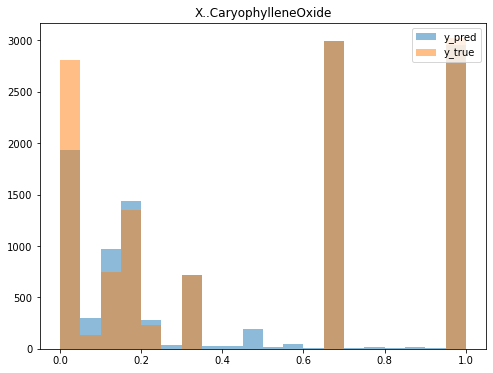

<Figure size 432x288 with 0 Axes>

In [49]:
# assume y_pred is a numpy array and y_true is a pandas dataframe
fig, ax = plt.subplots(figsize=(8, 6))

column = "X..CaryophylleneOxide"  # specify the target variable name
ax.hist(y_pred_knreg_test, alpha=0.5, label='y_pred', bins=20)
ax.hist(y_test[column], alpha=0.5, label='y_true', bins=20)
ax.legend(loc='upper right')
ax.set_title(column)

plt.show()
plt.savefig('error_hist_knn_tfidf_carox.png')

Pearson R

In [50]:
corr_coef, p_value = pearsonr(y_pred_knreg_test.flatten(), y_test.values.ravel())

print(f"Pearson correlation coefficient: {corr_coef:.3f}")
print(f"P-value: {p_value:.3f}")

Pearson correlation coefficient: 0.959
P-value: 0.000


<AxesSubplot:>

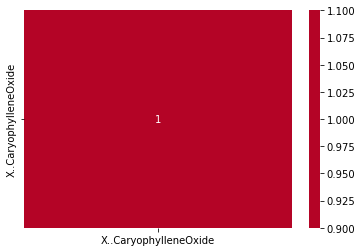

In [51]:
corr_matrix = y_test.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)